# 프로젝트 개요

[ 파일명 수정 ]
- 조(학번_이름, 학번_이름)_주제명.ipynb

[ 팀원 ]
- 팀원 1 학번 : 20511
- 팀원 1 이름 : 박희찬
- 팀원 2 학번 : 20514
- 팀원 2 이름 : 여준혁
 
[ 주제 ]
- 프로젝트 주제 : 인스타 사용자의 피드와전체 피트의 좋아요, 댓글의 총합을 사용해서 팔로우 수 예측하기

[ 유의사항 ]
- 각 단계마다 Markdown과 Code를 최대한 구체적으로 작성할 것
- 아래의 양식은 가이드라인일 뿐, 머신러닝 과정의 6단계와 필수 조건이 모두 존재한다면 양식 및 순서 등을 자유롭게 수정하여 작성 가능함

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 문제 정의 

[ 내용 ]
- 프로젝트 주제를 구체적으로 설명 (주제 / 선정 이유 / 계획 등)


[ 문제 정의 ]
- 주제 (# 필수 조건) : 
- 선정 이유 (# 필수 조건) :
- 계획 : 
- 

In [1]:
# 문제 정의

# 2. 데이터 수집

[ 내용 ]
- 프로젝트 진행을 위해 필요한 데이터 수집
- 사이킷런에 내장되어 있는 학습용 데이터 사용 금지
- 수집한 데이터의 소스(사이트 및 링크) 반드시 기재 

[ 데이터 수집 ]
- 데이터 파일명 (# 필수 조건) : 
- 데이터 소스 (# 필수 조건) : 
- 

In [2]:
# 데이터 수집

In [2]:
user_info = pd.read_csv("user_info.csv")
user_info

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
691,1,0.29,1,0.0,0,0,0,0,13,114,811,1
692,1,0.40,1,0.0,0,0,0,0,4,150,164,1
693,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
694,0,0.17,1,0.0,0,0,0,0,1,219,1695,1


# 3. 데이터 전처리

[ 내용 ]
- 데이터 분석 및 모델 학습을 위한 구조로 데이터를 가공하거나 변형
- 기본적으로 코드(판다스 및 넘파이 라이브러리 등 활용)를 통해 전처리 작업을 수행해야 하지만, 힘들 경우 데이터 파일 자체를 수정하여 전처리하여도 됨
- (# 필수 조건 : 위의 경우, 수행해야 하는 전처리 작업과 수행하지 못한 이유를 작성해야 함)
- 모든 전처리 작업이 수행된 최종 데이터를 명시해야 함

[ 데이터 전처리 ]
- 필요한 전처리 작업 : 
- 전처리 결과 : 
- 

In [3]:
# 데이터 전처리

# 4. 데이터 분석

[ 내용 ]
- 수집한 데이터의 탐색 및 분석을 진행
- 반드시 하나 이상의 그래프(맷플롯립 라이브러리 등 활용)를 활용해야 함 (# 필수 조건)
- 매 데이터 분석의 결과를 명시해야 함 (# 필수 조건)

[ 데이터 분석 ]
- 분석 내용 : 
- 분석 결과 : 
- 

In [4]:
# 데이터 분석

In [17]:
user_info.info()
user_info.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           696 non-null    int64  
 1   nums/length username  696 non-null    float64
 2   fullname words        696 non-null    int64  
 3   nums/length fullname  696 non-null    float64
 4   name==username        696 non-null    int64  
 5   description length    696 non-null    int64  
 6   external URL          696 non-null    int64  
 7   private               696 non-null    int64  
 8   #posts                696 non-null    int64  
 9   #followers            696 non-null    int64  
 10  #follows              696 non-null    int64  
 11  fake                  696 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 65.4 KB


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,6.960000e+02,696.000000,696.00000
mean,0.711207,0.166609,1.475575,0.042170,0.035920,23.412356,0.113506,0.369253,103.244253,7.914991e+04,555.086207,0.50000
std,0.453527,0.218964,1.076622,0.143664,0.186223,38.595721,0.317438,0.482950,378.028168,8.428875e+05,1023.613869,0.50036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+01,61.000000,0.00000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.655000e+02,252.000000,0.50000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,35.000000,0.000000,1.000000,77.000000,6.930000e+02,601.750000,1.00000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.00000


# 5. 모델 학습

[ 내용 ] 
- 머신러닝 알고리즘(회귀 및 분류)을 사용하여 모델의 학습을 진행
- 수업시간에 배운 것 이외의 알고리즘도 사용 가능함
- (# 필수 조건 : 위의 경우, 해당 알고리즘의 원리 및 간단한 설명을 작성해야 함)
- 반드시 '훈련 데이터'를 이용하여 모델의 학습을 진행해야 함 (# 필수 조건)

[ 모델 학습 ]
- 사용한 머신러닝 알고리즘 (# 필수 조건) : 
- 해당 알고리즘의 원리 : 
- 

In [5]:
# 모델 학습

In [15]:
data_input = user_info.drop(["fake"], axis=1).to_numpy()
data_target = user_info["fake"].to_numpy()

print(data_input[:5])
print(data_target[:5])

[[1.00e+00 2.70e-01 0.00e+00 0.00e+00 0.00e+00 5.30e+01 0.00e+00 0.00e+00
  3.20e+01 1.00e+03 9.55e+02]
 [1.00e+00 0.00e+00 2.00e+00 0.00e+00 0.00e+00 4.40e+01 0.00e+00 0.00e+00
  2.86e+02 2.74e+03 5.33e+02]
 [1.00e+00 1.00e-01 2.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  1.30e+01 1.59e+02 9.80e+01]
 [1.00e+00 0.00e+00 1.00e+00 0.00e+00 0.00e+00 8.20e+01 0.00e+00 0.00e+00
  6.79e+02 4.14e+02 6.51e+02]
 [1.00e+00 0.00e+00 2.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
  6.00e+00 1.51e+02 1.26e+02]]
[0 0 0 0 0]


In [22]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, test_size=0.15, stratify=data_target, random_state=1)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(591, 11) (591,)
(105, 11) (105,)


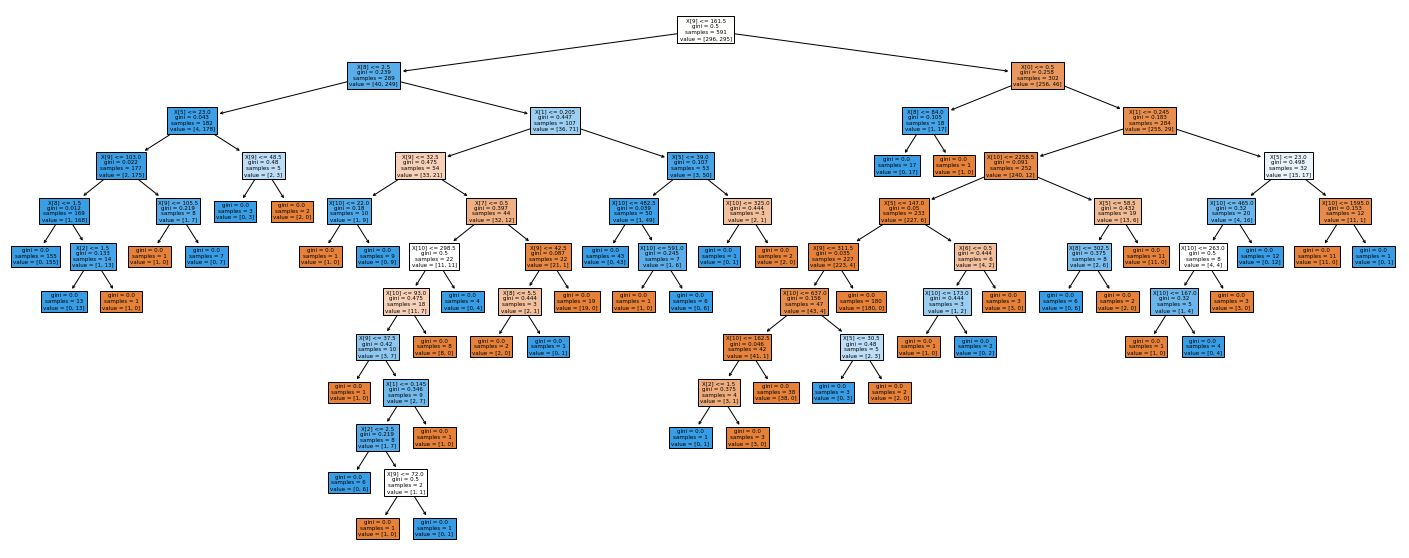

모델의 깊이: 11


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model_dtc_demo = DecisionTreeClassifier(random_state=1)
model_dtc_demo.fit(train_input, train_target)

plt.figure(figsize=(25, 10))
plot_tree(model_dtc_demo, filled=True)
plt.show()

print("모델의 깊이:", model_dtc_demo.get_depth())

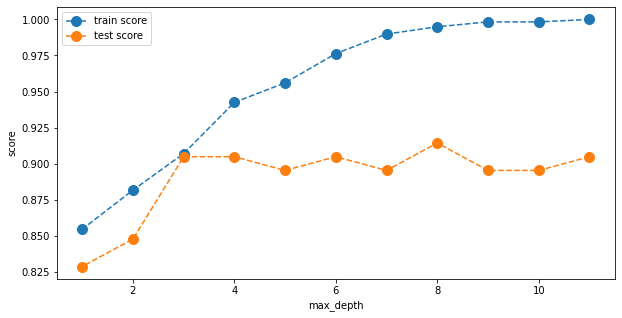

In [90]:
train_scores, test_scores = [], []
tree_range = range(model_dtc_demo.get_depth(), 0, -1)
for depth in tree_range:
    model_dtc_test = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model_dtc_test.fit(train_input, train_target)
    
    train_score = model_dtc_test.score(train_input, train_target)
    test_score = model_dtc_test.score(test_input, test_target)
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(10, 5))
plt.plot(tree_range, train_scores, "o--", markersize=10, label="train score")
plt.plot(tree_range, test_scores, "o--", markersize=10, label="test score")
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("score")
plt.show()

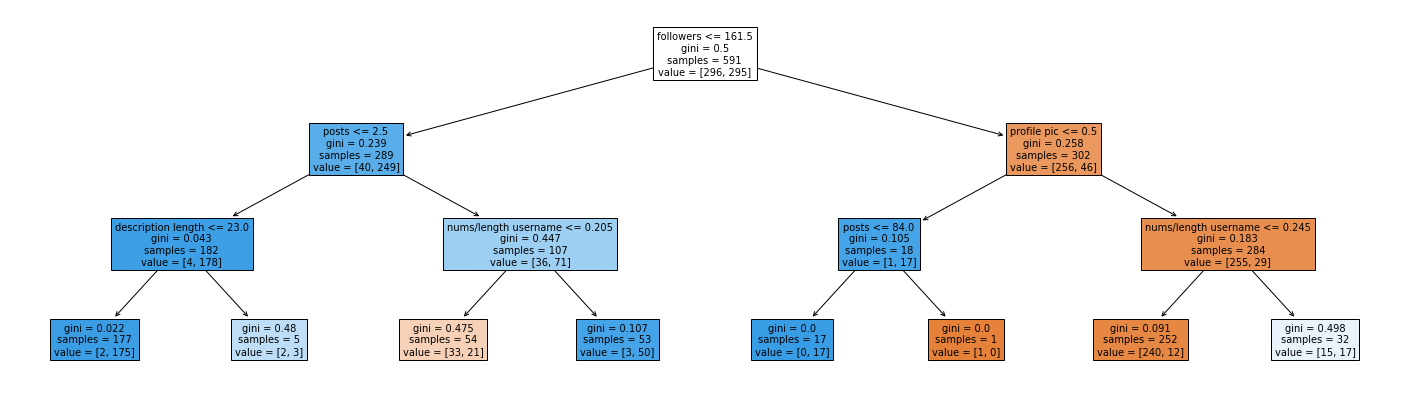

In [76]:
model_dtc = DecisionTreeClassifier(max_depth=3, random_state=1)
model_dtc.fit(train_input, train_target)

plt.figure(figsize=(25, 7))
plot_tree(model_dtc, filled=True, feature_names=["profile pic", "nums/length username", "fullname words", "nums/length fullname", "name==username", "description length", "external URL", "private", "posts", "followers", "follows"])
plt.show()

# 6. 모델 평가

[ 내용 ]
- 학습이 완료된 모델을 통해 값을 예측해보고, 최종적으로 모델의 성능을 평가
- 반드시 '테스트 데이터'를 이용하여 모델의 학습을 진행해야 함 (# 필수 조건)

[ 모델 평가 ]
- 성능 평가 결과 : 
- 

In [6]:
# 모델 평가

In [94]:
print("훈련 세트로 평가한 정확도:", model_dtc.score(train_input, train_target))
print("테스트 세트로 평가한 정확도:", model_dtc.score(test_input, test_target))

훈련 세트로 평가한 정확도: 0.9069373942470389
테스트 세트로 평가한 정확도: 0.9047619047619048


# 프로젝트 마무리

[ 결론 ]
- 진행한 프로젝트 정리

- 요약 (# 필수 조건) : 
- 의의 (# 필수 조건) : 
- 느낀점 (# 필수 조건) : 
- 